# 오전 수업

***

***

<!-- Markdown -->
# ** Cartogram

 : 데이터의 크기 등을 나타내기 위해서 지도의 면적을 왜곡하여 표현하는 그림

- 만드는 방식은 엑셀 등을 이용해서 지도를 그려내는 방식이 있음

 > 일러스트레이터나 web의 svg를 이용해서 그린 후 svg를 추출하는 방법

***

<!-- Markdown -->
# ** 인구 소멸 지역을 나타내는 cartogram과 colorpleth(단계 구분도)



## 1. 국가 통계 포털에서 인구정보를 다운로드

- population_raw_data.xlsx



## 2. 필요한 라이브러리를 import하고 그래프에서 한글을 위한 설정, 음수 표현을 위한 설정

In [1]:
# 배열 자료구조(행렬 포함), 선형대수, 과학 기술 계산을 위한 패키지
import numpy as np
# Series, DataFrame(자료구조), 기술 통계, 간단한 시각화를 위한 패키지
import pandas as pd

# 시각화 기본 패키지
import matplotlib.pyplot as plt

# 그래프에서 한글 처리를 위한 패키지
import platform
from matplotlib import font_manager, rc

# 데이터셋과 화려한 시각화를 위한 패키지
from sklearn import preprocessing

# 지도 시각화(단계 구분도)를 위한 패키지
import folium

# 그래프에서 한글 처리를 위한 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
    
# 음수 사용을 위한 설정
plt.rcParams['axes.unicode_minus'] = False

## 3. 엑셀 파일의 내용을 읽기

In [2]:
# 엑셀 파일의 내용 읽기
population = pd.read_excel('./data/population_raw_data.xlsx', header = 1)
# 데이터를 제대로 읽었는지 확인
print(population.head()); print()
population.info()

  행정구역(동읍면)별(1) 행정구역(동읍면)별(2)         항목           계   20 - 24세   25 - 29세  \
0            전국            소계   총인구수 (명)  51696216.0  3541061.0  3217367.0   
1           NaN           NaN  남자인구수 (명)  25827594.0  1877127.0  1682988.0   
2           NaN           NaN  여자인구수 (명)  25868622.0  1663934.0  1534379.0   
3         서울특별시            소계   총인구수 (명)   9930616.0   690728.0   751973.0   
4           NaN           NaN  남자인구수 (명)   4876789.0   347534.0   372249.0   

   30 - 34세   35 - 39세   65 - 69세   70 - 74세  75 - 79세  80 - 84세  85 - 89세  \
0   3517868  4016272.0  2237345.0  1781229.0   1457890  909130.0  416164.0   
1   1806754  2045265.0  1072395.0   806680.0    600607  319391.0  113221.0   
2   1711114  1971007.0  1164950.0   974549.0    857283  589739.0  302943.0   
3    803507   817467.0   448956.0   350580.0    251961  141649.0   66067.0   
4    402358   410076.0   211568.0   163766.0    112076   54033.0   19595.0   

   90 - 94세  95 - 99세     100+  
0  141488.0     34844  17562.

<!-- Markdown -->
## 4. 결측치(NA, None, Null, np.NaN) 처리

- 컬럼 자체를 제거
- NA인 행만 제거
- 다른 값으로 치환(이전값, 이후값, 중간값, 평균, 최빈값, 머신 러닝의 결과)

 > 머신러닝의 결과가 가장 정확할 가능성이 높지만 시간이 오래 걸림

In [3]:
# 이 엑셀 파일에서는 위와 항목이름이 같은 경우 NA
# 이전 값으로 NA를 채우기
population.fillna(method = 'ffill', inplace = True)
print(population.head()); print()
population.info()

  행정구역(동읍면)별(1) 행정구역(동읍면)별(2)         항목           계   20 - 24세   25 - 29세  \
0            전국            소계   총인구수 (명)  51696216.0  3541061.0  3217367.0   
1            전국            소계  남자인구수 (명)  25827594.0  1877127.0  1682988.0   
2            전국            소계  여자인구수 (명)  25868622.0  1663934.0  1534379.0   
3         서울특별시            소계   총인구수 (명)   9930616.0   690728.0   751973.0   
4         서울특별시            소계  남자인구수 (명)   4876789.0   347534.0   372249.0   

   30 - 34세   35 - 39세   65 - 69세   70 - 74세  75 - 79세  80 - 84세  85 - 89세  \
0   3517868  4016272.0  2237345.0  1781229.0   1457890  909130.0  416164.0   
1   1806754  2045265.0  1072395.0   806680.0    600607  319391.0  113221.0   
2   1711114  1971007.0  1164950.0   974549.0    857283  589739.0  302943.0   
3    803507   817467.0   448956.0   350580.0    251961  141649.0   66067.0   
4    402358   410076.0   211568.0   163766.0    112076   54033.0   19595.0   

   90 - 94세  95 - 99세     100+  
0  141488.0     34844  17562.

<!-- Markdown -->
## 5. 컬림이름 변경

- 데이터를 직접 다운로드 받을 시 컬럼이름을 사용하기 어려운 경우가 종종 발생

In [4]:
# 컬럼 이름 변경
population.rename(columns = {'행정구역(동읍면)별(1)' : '광역시도'
                   , '행정구역(동읍면)별(2)' : '시도'
                   , '계' : '인구수'}, inplace = True)
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
광역시도        846 non-null object
시도          846 non-null object
항목          846 non-null object
인구수         846 non-null float64
20 - 24세    846 non-null float64
25 - 29세    846 non-null float64
30 - 34세    846 non-null int64
35 - 39세    846 non-null float64
65 - 69세    846 non-null float64
70 - 74세    846 non-null float64
75 - 79세    846 non-null int64
80 - 84세    846 non-null float64
85 - 89세    846 non-null float64
90 - 94세    846 non-null float64
95 - 99세    846 non-null int64
100+        846 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


## 6. 시도가 소계인 데이터를 제외하여 가져오기

In [5]:
# 시도가 소계인 데이터를 제외
# 제외를 할 때는 drop을 이용해서 삭제할 수도 있고 필터링을 할 수도 있음
population = population[(population['시도'] != '소계')]
print(population.head())

     광역시도   시도         항목       인구수  20 - 24세  25 - 29세  30 - 34세  35 - 39세  \
6   서울특별시  종로구   총인구수 (명)  152737.0   11379.0   11891.0     10684   10379.0   
7   서울특별시  종로구  남자인구수 (명)   75201.0    5620.0    6181.0      5387    5034.0   
8   서울특별시  종로구  여자인구수 (명)   77536.0    5759.0    5710.0      5297    5345.0   
9   서울특별시   중구   총인구수 (명)  125249.0    8216.0    9529.0     10332   10107.0   
10  서울특별시   중구  남자인구수 (명)   62204.0    4142.0    4792.0      5192    5221.0   

    65 - 69세  70 - 74세  75 - 79세  80 - 84세  85 - 89세  90 - 94세  95 - 99세  \
6     7411.0    6636.0      5263    3104.0    1480.0     602.0       234   
7     3411.0    3009.0      2311    1289.0     506.0     207.0        89   
8     4000.0    3627.0      2952    1815.0     974.0     395.0       145   
9     6399.0    5313.0      4127    2502.0    1260.0     469.0       158   
10    3113.0    2405.0      1752     929.0     414.0     132.0        56   

     100+  
6   220.0  
7    73.0  
8   147.0  
9   160.0  
10   51.

### - 컬럼과 셀 변경

In [6]:
# 항목 컬럼을 구분으로 변경
population.rename(columns = {'항목':'구분'}, inplace = True)

# 셀의 값 변경
# 구분이 '총인구수(명)' 을 '합계'로
# 구분이 '남자인구수(명)'을 '남자'로
# 구분이 '여자인구수(명)'을 '여자'로

population.loc[population['구분'] == '총인구수 (명)'
               , '구분'] = '합계'
population.loc[population['구분'] == '남자인구수 (명)'
               , '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)'
               , '구분'] = '여자'

print(population['구분'].head())

6     합계
7     남자
8     여자
9     합계
10    남자
Name: 구분, dtype: object


### - 청년과 노년을 분리하기 위해서 20-39까지의 합계와 65-100+까지의 합계를 새로운 컬럼으로 추가

In [7]:
# 청년과 노년층으로 새로운 컬럼 추가
population['청년'] = (population['20 - 24세'] 
                    + population['25 - 29세'] 
                    + population['30 - 34세'] 
                    + population['35 - 39세'])
            
population['노년'] = (population['65 - 69세'] 
                    + population['70 - 74세'] 
                    + population['75 - 79세'] 
                    + population['80 - 84세'] 
                    + population['85 - 89세'] 
                    + population['90 - 94세'] 
                    + population['95 - 99세'] 
                    + population['100+'])

population.info(); print()
print(population.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 6 to 845
Data columns (total 18 columns):
광역시도        792 non-null object
시도          792 non-null object
구분          792 non-null object
인구수         792 non-null float64
20 - 24세    792 non-null float64
25 - 29세    792 non-null float64
30 - 34세    792 non-null int64
35 - 39세    792 non-null float64
65 - 69세    792 non-null float64
70 - 74세    792 non-null float64
75 - 79세    792 non-null int64
80 - 84세    792 non-null float64
85 - 89세    792 non-null float64
90 - 94세    792 non-null float64
95 - 99세    792 non-null int64
100+        792 non-null float64
청년          792 non-null float64
노년          792 non-null float64
dtypes: float64(12), int64(3), object(3)
memory usage: 117.6+ KB

     광역시도   시도  구분       인구수  20 - 24세  25 - 29세  30 - 34세  35 - 39세  \
6   서울특별시  종로구  합계  152737.0   11379.0   11891.0     10684   10379.0   
7   서울특별시  종로구  남자   75201.0    5620.0    6181.0      5387    5034.0   
8   서울특별시  종로구  여자   77536.0

## 7. 피봇 테이블(행과 열을 설정해서 데이터의 기술 통계 값을 확인) 생성

In [8]:
# 광역시도와 시도별 그리고 구분 별로 청년과 노년 값 확인
pop = pd.pivot_table(population
                     , index = ['광역시도', '시도']
                     , columns = '구분'
                     , values = ['인구수', '청년', '노년'])
print(pop.head())

               노년                         인구수                           청년  \
구분             남자       여자       합계        남자        여자        합계       남자   
광역시도 시도                                                                      
강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0  26286.0   
     고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   4494.0   
     동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0  11511.0   
     삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   8708.0   
     속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   9956.0   

                            
구분             여자       합계  
광역시도 시도                     
강원도  강릉시  23098.0  49384.0  
     고성군   2529.0   7023.0  
     동해시   9753.0  21264.0  
     삼척시   7115.0  15823.0  
     속초시   8752.0  18708.0  


## 8. 소멸 비율 컬럼을 생성해서 추가

- 청년층 여자 / (노년층 합계 / 2)

In [13]:
# 소멸 비율 컬럼
# 청년층 여자 / (노년층 합계 / 2)
pop['소멸비율'] = pop['청년', '여자'] / (pop['노년', '합계'] / 2)
print(pop['소멸비율'].head())

광역시도  시도 
강원도   강릉시    1.226041
      고성군    0.707314
      동해시    1.289738
      삼척시    0.973990
      속초시    1.372647
Name: 소멸비율, dtype: float64


## 9. 소멸위기지역 컬럼 추가

- 소멸비율이 1.0 미만이면 True, 아니면 False

In [14]:
# 소멸위기지역 컬럼 추가
# 소멸비율 < 1.0 여부로 True/False 판단
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
print(pop['소멸위기지역'].head(100))

광역시도  시도 
강원도   강릉시    False
      고성군     True
      동해시    False
      삼척시     True
      속초시    False
             ...  
경상북도  구미시    False
      군위군     True
      김천시    False
      남구     False
      문경시     True
Name: 소멸위기지역, Length: 100, dtype: bool


In [15]:
print(pop[pop['소멸위기지역'] == True].index.get_level_values(1)); print()
print(pop[pop['소멸위기지역'] == False].index.get_level_values(1))

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

Index(['강릉시', '동해시', '속초시', '양구군', '원주시', '인제군', '철원군', '춘천시', '태백시', '화천군',
       ...
       '상당구', '서원구', '음성군', '제천시', '증평군', '진천군', '청원구', '청주시', '충주시', '흥덕구'],
      dtype='object', name='시도', length=181)


## 10. 인덱스로 설정되어 있는 광역시도와 시도를 일반 컬럼으로 전환
- 인덱스를 컬럼으로 만드려면 인덱스를 제거하면 됨

In [17]:
# 인덱스를 제거
pop.reset_index(inplace = True)
print(pop.head())

   index 광역시도   시도       노년                         인구수                      \
구분                       남자       여자       합계        남자        여자        합계   
0      0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1      1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2      2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3      3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4      4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

         청년                        소멸비율 소멸위기지역  
구분       남자       여자       합계                   
0   26286.0  23098.0  49384.0  1.226041  False  
1    4494.0   2529.0   7023.0  0.707314   True  
2   11511.0   9753.0  21264.0  1.289738  False  
3    8708.0   7115.0  15823.0  0.973990   True  
4    9956.0   8752.0  18708.0  1.372647  False  


## 11. 2단으로 구성된 광역시도와 시도를 합쳐서 하나의 컬럼 만들기

In [18]:
# 컬럼이름 만들기
# 컬럼이름이 2레벨로 되어 있어 위아래 레벨을 합치는 작업
tmp_columns = [pop.columns.get_level_values(0)[n] 
               + pop.columns.get_level_values(1)[n] 
               for n in range(0, len(pop.columns.get_level_values(0)))]
print(tmp_columns)

['index', '광역시도', '시도', '노년남자', '노년여자', '노년합계', '인구수남자', '인구수여자', '인구수합계', '청년남자', '청년여자', '청년합계', '소멸비율', '소멸위기지역']


In [20]:
pop.columns = tmp_columns
print(pop.head())

   index 광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
0      0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1      1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2      2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3      3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4      4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

      청년남자     청년여자     청년합계      소멸비율  소멸위기지역  
0  26286.0  23098.0  49384.0  1.226041   False  
1   4494.0   2529.0   7023.0  0.707314    True  
2  11511.0   9753.0  21264.0  1.289738   False  
3   8708.0   7115.0  15823.0  0.973990    True  
4   9956.0   8752.0  18708.0  1.372647   False  


In [22]:
# 시도 이름 확인
print(pop['시도'].unique()); print()
print(len(pop['시도'].unique()))

['강릉시' '고성군' '동해시' '삼척시' '속초시' '양구군' '양양군' '영월군' '원주시' '인제군' '정선군' '철원군'
 '춘천시' '태백시' '평창군' '홍천군' '화천군' '횡성군' '가평군' '고양시' '과천시' '광명시' '광주시' '구리시'
 '군포시' '권선구' '기흥구' '김포시' '남양주시' '단원구' '덕양구' '동두천시' '동안구' '만안구' '부천시' '분당구'
 '상록구' '성남시' '소사구' '수원시' '수정구' '수지구' '시흥시' '안산시' '안성시' '안양시' '양주시' '양평군'
 '여주시' '연천군' '영통구' '오산시' '오정구' '용인시' '원미구' '의왕시' '의정부시' '이천시' '일산동구'
 '일산서구' '장안구' '중원구' '처인구' '파주시' '팔달구' '평택시' '포천시' '하남시' '화성시' '거제시' '거창군'
 '김해시' '남해군' '마산합포구' '마산회원구' '밀양시' '사천시' '산청군' '성산구' '양산시' '의령군' '의창구'
 '진주시' '진해구' '창녕군' '창원시' '통영시' '하동군' '함안군' '함양군' '합천군' '경산시' '경주시' '고령군'
 '구미시' '군위군' '김천시' '남구' '문경시' '봉화군' '북구' '상주시' '성주군' '안동시' '영덕군' '영양군'
 '영주시' '영천시' '예천군' '울릉군' '울진군' '의성군' '청도군' '청송군' '칠곡군' '포항시' '광산구' '동구'
 '서구' '달서구' '달성군' '수성구' '중구' '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구' '부산진구'
 '사상구' '사하구' '수영구' '연제구' '영도구' '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구' '구로구'
 '금천구' '노원구' '도봉구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구' '성북구' '송파구' '양천구'
 '영등포구' '용산구' '은평구' '종로구' '중랑구' '세종특별자치시' '울주군' '강화군' '

## 12. 시도이름 만들기
- 광역시는 구별로 분류되어 있으나 자치구가 아닌 일반행정구를 가진 시도는 분류되어 있지 않음
- 행정구역을 알아야 좋음

In [43]:
# 시도이름 만들기
si_name = [None] * len(pop)

# 자치구가 아닌 일반행정구를 가진 시도의 딕셔너리 만들기
tmp_gu_dict =  {'수원':['장안구', '권선구', '팔달구', '영통구']
                , '성남':['수정구', '중원구', '분당구']
                , '안양':['만안구', '동안구']
                , '안산':['상록구', '단원구']
                , '고양':['덕양구', '일산동구', '일산서구']
                , '용인':['처인구', '기흥구', '수지구']
                , '청주':['상당구', '서원구', '흥덕구', '청원구']
                , '천안':['동남구', '서북구']
                , '전주':['완산구', '덕진구']
                , '포항':['남구', '북구']
                , '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
                , '부천':['오정구', '원미구', '소사구']}

for n in pop.index:
    # 광역시나 특별시 또는 자치시로 끝나지 않는
    if pop['광역시도'][n][-3] not in ['광역시', '특별시', '자치시']:
        # 중복된 지역인 고성에 대한 처리
        if pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '강원도':
            si_name[n] = '고성(강원)'

        elif pop['시도'][n][:-1] == '고성' and pop['광역시도'][n] == '경상남도':
            si_name[n] = '고성(경남)'
        else:
            si_name[n] = pop['시도'][n][:-1]
            # 자치구가 아닌 일반행정구를 가지고 있는 시도 처리
            for keys, values in tmp_gu_dict:
                if pop['시도'][n] in values:
                    if len(pop['시도'][n]) == 2:
                        si_name[n] = keys + ' ' + pop['시도'][n]
                    elif pop['시도'][n] in ['마산합포구', '마산회원구']:
                        si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                    else:
                        si_name[n] = keys + ' ' + pop['시도'][n][:-1]
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
    else:
        if len(pop['시도'][n]) == 2:
            si_name[n] = pop['광역시도'][n][:2] + '' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + '' + pop['시도'][n][:-1]

In [44]:
print(si_name)

['강릉', '고성(강원)', '동해', '삼척', '속초', '양구', '양양', '영월', '원주', '인제', '정선', '철원', '춘천', '태백', '평창', '홍천', '화천', '횡성', '가평', '고양', '과천', '광명', '광주', '구리', '군포', '권선', '기흥', '김포', '남양주', '단원', '덕양', '동두천', '동안', '만안', '부천', '분당', '상록', '성남', '소사', '수원', '수정', '수지', '시흥', '안산', '안성', '안양', '양주', '양평', '여주', '연천', '영통', '오산', '오정', '용인', '원미', '의왕', '의정부', '이천', '일산동', '일산서', '장안', '중원', '처인', '파주', '팔달', '평택', '포천', '하남', '화성', '거제', '거창', '고성(경남)', '김해', '남해', '마산합포', '마산회원', '밀양', '사천', '산청', '성산', '양산', '의령', '의창', '진주', '진해', '창녕', '창원', '통영', '하동', '함안', '함양', '합천', '경산', '경주', '고령', '구미', '군위', '김천', '남', '문경', '봉화', '북', '상주', '성주', '안동', '영덕', '영양', '영주', '영천', '예천', '울릉', '울진', '의성', '청도', '청송', '칠곡', '포항', '광산', '남', '동', '북', '서', '남', '달서', '달성', '동', '북', '서', '수성', '중', '대덕', '동', '서', '유성', '중', '강서', '금정', '기장', '남', '동', '동래', '부산진', '북', '사상', '사하', '서', '수영', '연제', '영도', '중', '해운대', '강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '노원', '도봉', '동대문', '동작', '마포', '서대문', '서초', '

## 13. 도시 이름을 pop에 새로운 컬럼으로 추가

In [45]:
# 시도 이름을 pop에 새로운 컬럼으로 추가
pop['ID'] = si_name
print(pop['ID'])

0          강릉
1      고성(강원)
2          동해
3          삼척
4          속초
        ...  
259        진천
260        청원
261        청주
262        충주
263        흥덕
Name: ID, Length: 264, dtype: object


In [46]:
# 현재 상태 확인
print(pop.head())

   index 광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
0      0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1      1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2      2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3      3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4      4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

      청년남자     청년여자     청년합계      소멸비율  소멸위기지역      ID  
0  26286.0  23098.0  49384.0  1.226041   False      강릉  
1   4494.0   2529.0   7023.0  0.707314    True  고성(강원)  
2  11511.0   9753.0  21264.0  1.289738   False      동해  
3   8708.0   7115.0  15823.0  0.973990    True      삼척  
4   9956.0   8752.0  18708.0  1.372647   False      속초  


## 14.지도 정보를 저장한 엑셀 파일 읽기

In [47]:
# 지도 정보 가지느 Excel 파일 읽기
draw_korea_draw = pd.read_excel('./data/draw_korea_raw.xlsx')
print(draw_korea_draw)

       0      1      2       3       4       5      6       7      8      9   \
0     NaN    NaN    NaN     NaN     NaN     NaN    NaN      철원     화천     양구   
1     NaN    NaN    NaN      양주     동두천      연천     포천     의정부     인제     춘천   
2     NaN    NaN    NaN   고양 덕양  고양 일산동   서울 도봉  서울 노원     남양주     홍천     횡성   
3     NaN    NaN     파주  고양 일산서      김포   서울 강북  서울 성북      가평     구리     하남   
4     NaN    NaN  부천 소사   안양 만안      광명  서울 서대문  서울 종로  서울 동대문  서울 중랑     양평   
5     NaN  인천 강화  부천 원미   안양 동안   서울 은평   서울 마포  서울 중구   서울 성동  서울 강동     여주   
6     NaN  인천 서구  부천 오정      시흥   서울 강서   서울 동작  서울 용산   서울 광진  서울 송파     이천   
7     NaN  인천 동구  인천 계양   안산 상록   서울 양천   서울 관악  서울 서초   성남 중원     과천     광주   
8     NaN    NaN  인천 부평   안산 단원  서울 영등포   서울 금천  서울 강남   성남 분당  성남 수정  용인 수지   
9     NaN  인천 중구  인천 남구      화성   서울 구로      군포     의왕   수원 영통  용인 기흥  용인 처인   
10  인천 옹진  인천 연수  인천 남동      오산      안성   수원 권선  수원 장안      제천     예천     영주   
11     태안     아산  천안 동남   천안 서북      평택 

## 15.각 셀의 위치를 좌표로 만들기

In [48]:
# 컬럼 이름이 일련 번호로 되어 있음
# stack 함수를 이용해서 컬럼이름을 인덱스로 만들기
draw_korea_raw_stacked = pd.DataFrame(draw_korea_draw.stack())
print(draw_korea_raw_stacked)

            0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]


In [49]:
# 인덱스를 초기화해서 인덱스가 컬럼이 되도록 하기
draw_korea_raw_stacked.reset_index(inplace = True)
print(draw_korea_raw_stacked)

     level_0  level_1       0
0          0        7      철원
1          0        8      화천
2          0        9      양구
3          0       10  고성(강원)
4          1        3      양주
..       ...      ...     ...
247       24        2      장흥
248       24        3      보성
249       25        2      완도
250       25        5      제주
251       26        5     서귀포

[252 rows x 3 columns]


In [51]:
# 좌표로 사용하기 위해 컬럼 이름 변경
draw_korea_raw_stacked.rename(columns = {'level_0' : 'y'
                                         , 'level_1' : 'x'
                                         , 0 : 'ID'}
                              , inplace = True)
print(draw_korea_raw_stacked)

      y   x      ID
0     0   7      철원
1     0   8      화천
2     0   9      양구
3     0  10  고성(강원)
4     1   3      양주
..   ..  ..     ...
247  24   2      장흥
248  24   3      보성
249  25   2      완도
250  25   5      제주
251  26   5     서귀포

[252 rows x 3 columns]


## 16. 지도 그리기
### 1) 경계선 만들기 위한 좌표 생성 

### 2) 지도 그리기

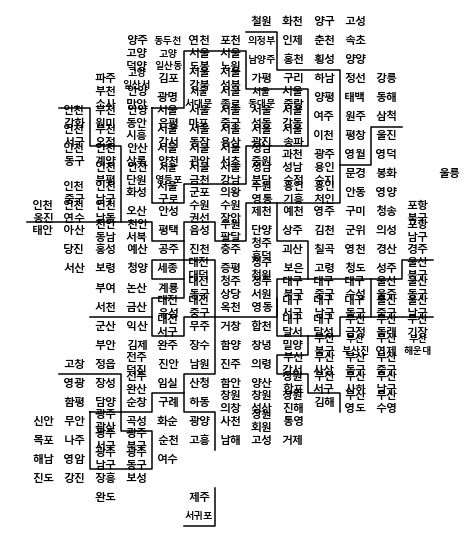

In [65]:
# 경계선을 위한 좌표 생성
# cartogram 의 기본이 되는 지도 그리기
BORDER_LINES = [[(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
                [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
                [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), (11,4), (11,3)], # 경기도
                [(8,10), (8,11), (6,11), (6,12)], # 강원도
                [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), (15,4), (16,4), (16,2)], # 충청북도
                [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
                [(13,5), (13,6), (16,6)], # 대전시
                [(13,5), (14,5)], #세종시
                [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
                [(20,5), (21,5), (21,6), (23,6)], #전라남도
                [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
                [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
                [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
                [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
                [(16,11), (16,13)], #울산 # [(9,14), (9,15)],
                [(27,5), (27,6), (25,6)],
               ]

plt.figure(figsize = (8, 10))
# 지역 이름 표시
for idx, row in draw_korea_raw_stacked.iterrows():
    if len(row['ID'].split()) == 2:
        dispname = '{}\n{}'.format(row['ID'].split()[0]
                                   , row['ID'].split()[1])
    # 마지막 두 글자가 고성이라면 고성이라고 출력
    elif row['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row['ID']
    # 세 글자가 넘으면 세 글자만 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    # 글자 작성
    plt.annotate(dispname
                 , (row['x'] + 0.5, row['y'] + 0.5)
                 , weight = 'bold'
                 ,fontsize = fontsize
                 , ha = 'center'
                 , va = 'center'
                 ,linespacing = linespacing)
    
# 경계선 그리기
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c = 'black', lw = 1.5)
    
# 상하 뒤집기
# 엑셀은 하단으로 갈 때 좌표가 증가하지만 모니터는 상단으로 갈 때 좌표가 증가함
plt.gca().invert_yaxis()

# 축 제거
plt.axis('off')

plt.show()

<!-- Markdown -->
## 17. pop의 시도이름과 draw_korea_raw_stacked의 ID 일치시키기
- set은 합집합, 교집합, 차집합, 여집합을 계산할 수 있음

In [70]:
# pop의 ID와 draw_korea_raw_stacked의 ID 불일치 찾기
print(pop.head()) ; print()

print(set(draw_korea_raw_stacked['ID'].unique())
     - set(pop['ID'].unique())) ; print()

print(set(pop['ID'].unique()) 
      - set(draw_korea_raw_stacked['ID'].unique()))

   index 광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
0      0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1      1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2      2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3      3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4      4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

      청년남자     청년여자     청년합계      소멸비율  소멸위기지역      ID  
0  26286.0  23098.0  49384.0  1.226041   False      강릉  
1   4494.0   2529.0   7023.0  0.707314    True  고성(강원)  
2  11511.0   9753.0  21264.0  1.289738   False      동해  
3   8708.0   7115.0  15823.0  0.973990    True      삼척  
4   9956.0   8752.0  18708.0  1.372647   False      속초  

{'청주 상당', '인천 남구', '용인 기흥', '서울 동작', '부산 강서', '서울 성동', '수원 영통', '부산 사상', '울산 북구', '서울 구로', '울산 울주', '서울 양천', '부산 동구', '인천 중구', '창원 의창', '부산 해운대', '인천 서구', '대구 동구', '인천 연수', '부산 서구', 

In [72]:
# pop에는 있으나 draw에는 없는 데이터를 제거할 리스트 만들기
del_list = list(set(pop['ID'].unique()) - set(draw_korea_raw_stacked['ID'].unique()))

# 리스트를 순회하면서 데이터 제거
for rownum in del_list:
    pop = pop.drop(pop[pop['ID'] == rownum].index)
    
print(set(pop['ID'].unique()) 
      - set(draw_korea_raw_stacked['ID'].unique()))

set()


<!-- MarkDown -->
***
> set은 합집합, 교집합, 차집합 연산이 가능함
***

## 18. pop와 draw_korea_raw_stacked를 join

In [74]:
pop = pd.merge(pop, draw_korea_raw_stacked, how = 'inner', on = ['ID'])
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 141
Data columns (total 17 columns):
index     142 non-null int64
광역시도      142 non-null object
시도        142 non-null object
노년남자      142 non-null float64
노년여자      142 non-null float64
노년합계      142 non-null float64
인구수남자     142 non-null float64
인구수여자     142 non-null float64
인구수합계     142 non-null float64
청년남자      142 non-null float64
청년여자      142 non-null float64
청년합계      142 non-null float64
소멸비율      142 non-null float64
소멸위기지역    142 non-null bool
ID        142 non-null object
y         142 non-null int64
x         142 non-null int64
dtypes: bool(1), float64(10), int64(3), object(3)
memory usage: 19.0+ KB


***

***

# 오후수업

***

## 19. 좌표와 인구수를 이용해서 pivot 테이블을 생성

In [77]:
# 좌표와 인구수를 가지고 pivot 테이블 만들기
mapdata = pop.pivot_table(index = 'y', columns = 'x', values = '인구수합계')
print(mapdata)

x         0         1         2         3         4         5         6   \
y                                                                          
0        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1        NaN       NaN       NaN  205513.0   98277.0   45907.0  154763.0   
2        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3        NaN       NaN  430781.0       NaN  363443.0       NaN       NaN   
4        NaN       NaN       NaN       NaN  339484.0       NaN       NaN   
5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
6        NaN       NaN       NaN  402888.0       NaN       NaN       NaN   
7        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9        NaN       NaN       NaN  640890.0       NaN  284890.0  156763.0   
10       NaN       NaN       NaN  208656.0  182896.0       NaN       NaN   
11   63900.0

In [80]:
# NaN 제거를 위한 작업
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
print(masked_mapdata)
# NaN 데이터는 --로 변환

[[-- -- -- -- -- -- -- 48013.0 26264.0 24010.0 30114.0 -- -- --]
 [-- -- -- 205513.0 98277.0 45907.0 154763.0 438457.0 32720.0 280707.0
  81793.0 -- -- --]
 [-- -- -- -- -- -- -- 662154.0 70076.0 45991.0 27218.0 -- -- --]
 [-- -- 430781.0 -- 363443.0 -- -- 62448.0 193763.0 211101.0 38718.0
  213846.0 -- --]
 [-- -- -- -- 339484.0 -- -- -- -- 111367.0 47070.0 93297.0 -- --]
 [-- -- -- -- -- -- -- -- -- 111563.0 337979.0 69599.0 -- --]
 [-- -- -- 402888.0 -- -- -- -- -- 210359.0 43318.0 51738.0 -- --]
 [-- -- -- -- -- -- -- -- 63778.0 327723.0 40073.0 39052.0 -- --]
 [-- -- -- -- -- -- -- -- -- -- 74702.0 33539.0 -- 10001.0]
 [-- -- -- 640890.0 -- 284890.0 156763.0 -- -- -- 168798.0 17713.0 -- --]
 [-- -- -- 208656.0 182896.0 -- -- 136517.0 46166.0 109247.0 419891.0
  26301.0 -- --]
 [63900.0 302929.0 -- -- 470832.0 97787.0 -- 30503.0 101799.0 142256.0
  24171.0 54014.0 -- --]
 [-- 166630.0 99971.0 81339.0 109931.0 69950.0 208350.0 -- 38973.0
  123199.0 100521.0 258037.0 259452.0 --]
 [-

## 20. 컬럼이름과 dataframe 그리고 색상이름을 대입하면 cartogram을 그려주는 함수 선언

## 21. 인구 수 합계를 이용해서 그리기

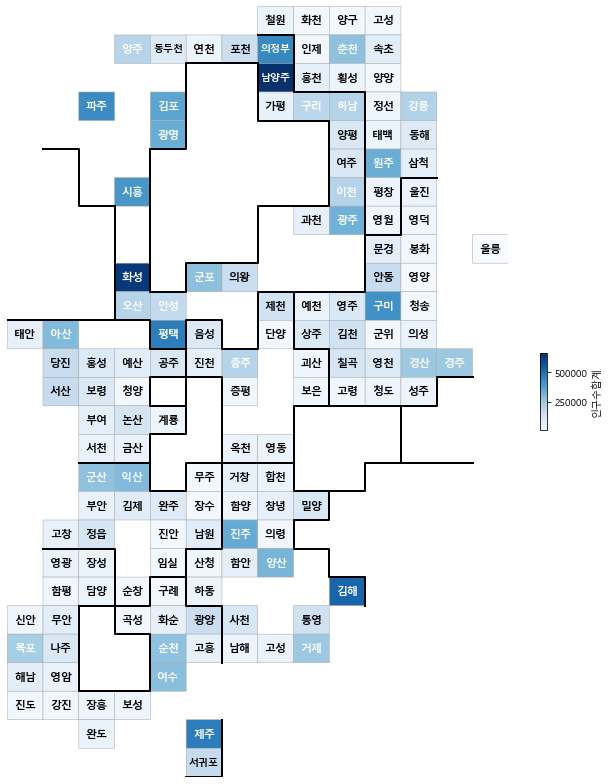

In [85]:
# p.233

#컬럼이름을 문자열로 설정하고 데이터프레임을 대입하고 색상명을 설정하면
#cartogram을 그려주는 메소드
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    #인구수 데이터의 크고 낮음을 분류하기 위한 값 만들기
    whitelabelmin = (max(blockedMap[targetData]) - 
                min(blockedMap[targetData]))*0.25 + \
                min(blockedMap[targetData])
    #컬럼이름을 대입하기
    datalabel = targetData
    #최대값과 최소값 구하기
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])
    #x 와 y를 가지고 피봇 테이블 만들기
    mapdata = blockedMap.pivot_table(
            index='y', columns='x', values=targetData)
    #데이터가 존재하는 것 골라내기
    masked_mapdata = np.ma.masked_where(
            np.isnan(mapdata), mapdata)
    #그래프 영역 크기 만들기
    plt.figure(figsize=(9, 11))
    #색상 설정
    #지도에 색상을 설정
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)
    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.
            
        #글자색상 만들기
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        #텍스트 출력하기
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그리기
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

#그리기
drawKorea('인구수합계', pop, 'Blues')

## 22. 인구 소멸 위기지역 그리기

In [87]:
print(pop.head())

   index 광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자     인구수합계  \
0      0  강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0  213846.0   
1      1  강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   30114.0   
2      2  강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   93297.0   
3      3  강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   69599.0   
4      4  강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   81793.0   

      청년남자     청년여자     청년합계      소멸비율  소멸위기지역      ID  y   x  
0  26286.0  23098.0  49384.0  1.226041       0      강릉  3  11  
1   4494.0   2529.0   7023.0  0.707314       1  고성(강원)  0  10  
2  11511.0   9753.0  21264.0  1.289738       0      동해  4  11  
3   8708.0   7115.0  15823.0  0.973990       1      삼척  5  11  
4   9956.0   8752.0  18708.0  1.372647       0      속초  1  10  


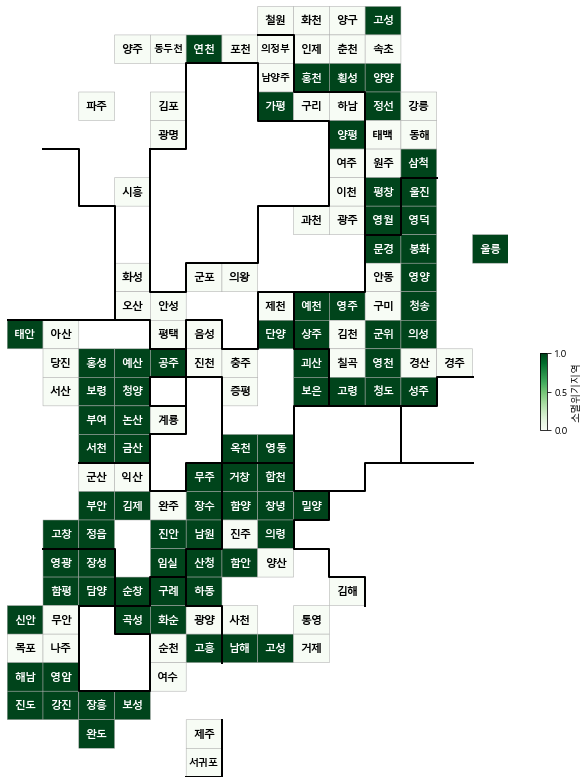

In [103]:
# 소멸위기지역을 수치 데이터로 변환
# True: 1, False: 0
pop['소멸위기지역'] = [1 if imsi else 0 for imsi in pop['소멸위기지역']]
"""
li = []
for imsi in pop['소멸위기지역']:
    if imsi == True:
        li.append(1)
    else:
        li.append(0)
"""

drawKorea('소멸위기지역', pop, 'Greens')

***
## 참고
***

# Python에서 인스턴스 메소드 호출
> 클래스.메소드이름(인스턴스)
> : unbound 호출
>
> 인스턴스.메소드이름()
> : bound 호출

class X:
    def func(self):
        print('인스턴스 메소드')

> x = X()
>
> x.func()
>
> X.func(x)


***
***

# ** 위의 데이터를 이용해서 단계구분도(colorpath) 그리기
- 단계구분도를 그릴 때는 그리고자 하는 지도의 경계를 나타내는 json파일이 있어야 함
- 우리나라 데이터는 southkorea-maps 를 검색하면 github에서 제공
- korea_geo_simple.json

In [90]:
# 단계 구분도를 위한 라이브러리
import folium
import json

# 데이터에서 지역이름을 인덱스로 설정
pop_folium = pop.set_index('ID')
print(pop_folium)

        index  광역시도   시도     노년남자     노년여자     노년합계     인구수남자     인구수여자  \
ID                                                                        
강릉          0   강원도  강릉시  15767.0  21912.0  37679.0  106231.0  107615.0   
고성(강원)      1   강원도  고성군   2900.0   4251.0   7151.0   15899.0   14215.0   
동해          2   강원도  동해시   6392.0   8732.0  15124.0   47166.0   46131.0   
삼척          3   강원도  삼척시   5892.0   8718.0  14610.0   35253.0   34346.0   
속초          4   강원도  속초시   5139.0   7613.0  12752.0   40288.0   41505.0   
...       ...   ...  ...      ...      ...      ...       ...       ...   
음성        256  충청북도  음성군   7301.0   9605.0  16906.0   51372.0   46415.0   
제천        257  충청북도  제천시  10227.0  13904.0  24131.0   68444.0   68073.0   
증평        258  충청북도  증평군   2206.0   3117.0   5323.0   19110.0   18198.0   
진천        259  충청북도  진천군   4731.0   6575.0  11306.0   36387.0   33563.0   
충주        262  충청북도  충주시  14407.0  20383.0  34790.0  104877.0  103473.0   

           인구수합계     청년남

In [95]:
# 표시하고자 하는 지도의 경계선 데이터를 가져옴
geo_str = json.load(open('./data/korea_geo_simple.json', encoding = 'utf-8'))
print(geo_str)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': '서귀포', 'properties': {'code': '39020', 'name': '서귀포시', 'name_eng': 'Seogwipo-si', 'base_year': '2013'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[126.1701670531016, 33.27833920373795], [126.17796199822318, 33.28904450342792], [126.20366562455006, 33.292582069125935], [126.23227804627976, 33.28054651709448], [126.27081469983565, 33.29305651947374], [126.28692516789717, 33.3095121006344], [126.32582807936741, 33.32307849544494], [126.33863040850332, 33.33700002289742], [126.37692773779688, 33.34348978209229], [126.42008790072302, 33.33448285889923], [126.43967991919219, 33.34042205120408], [126.44742456956253, 33.35529267692266], [126.4918716225209, 33.351283204155564], [126.54001194569452, 33.35949354681064], [126.55310458705854, 33.368769331336765], [126.5830715764017, 33.368027779973275], [126.65655971322707, 33.39658294968576], [126.68911351796443, 33.39691133705054], [126.70784071345439, 33.41819831436605],

In [98]:
# 지도 출력
map = folium.Map(location = [36.2002, 127.054]
                 , zoom_start = 7)

map.choropleth(geo_data = geo_str
               , data = pop_folium['인구수합계']
               , fill_color = 'YlGnBu'
               , key_on = 'feature.id'
               , columns = [pop_folium.index
                            , pop_folium['인구수합계']])

map.save('pop.html')

In [100]:
# 지도 출력
map = folium.Map(location = [36.2002, 127.054]
                 , zoom_start = 7)

map.choropleth(geo_data = geo_str
               , data = pop_folium['소멸위기지역']
               , fill_color = 'YlGnBu'
               , key_on = 'feature.id'
               , columns = [pop_folium.index
                            , pop_folium['소멸위기지역']])

map.save('pop.html')

***

# ** 통계학
#### : 논리적 사고와 객관적인 사실에 따르며 일반적이고 확률적 결정론에 따라 인과관계를 규명
> 수집된 자료의 특성을 쉽게 파악하기 위해 대표값이나 표 또는 그래프로 요약하는 기술통계학
>
> 모집단에서 추출한 정보를 이용해서 다양한 특성을 과학적으로 추론하는 추론 통계학(검정, 분산분석, 회귀분석 등)으로 나눔

# ** 기술 통계
#### : 자료들을 요약하는 기초적인 통계량
- 모집단의 특성을 유추
- 빈도분석
> : 개수파악
- 기술통계분석
> : 평균이나 합계 등을 구하는 것

## 1. 기술통계함수
- numpy에서 numpy가 기술통계함수를 소유
> numpy.mean(데이터)
- pandas에서는 Series나 DataFrame이 기술 통계함수를 소유
> DataFrame객체.mean()
>
> DataFrame.mean(데이터프레임)
- count, min, max, sum, std, var, median, mean(평균)
- argmin, argmax, idxmin, idxmax(최댓값을 가진 데이터의 위치)
- quantile(사분위수)
> IQR(75% - 25%)
- describe
> : 최대, 최소, 평균, 중간값, 4분위수를 리턴
- diff(이전항과의 차), pct_change(이전 항과의 비율)
- 하나의 컬럼에만 사용가능한 함수
> unique() : 유일한 값들 리턴
>
> value_cout() : 각 데이터의 개수

## 2. 평균(mean)
### 1) 산술 평균
#### : 데이터의 총합을 데이터의 개수로 나눈 값

### 2) 기하 평균
> 매출액이 100인 회사에서 다음 해에 매출액이 110이 되었고 그 다음해에 107.8을 기록했다면 평균 성장률은?
>
> 첫 해에 10% 증가했고 다음 해에 2% 감소했으므로 평균 성장률은 (10/2)/2 = 4%?
>
> 1.1 * 0.98의 제곱근

### 3) 조화평균
#### : 2개의 값의 곱에 2를 곱한 후 2개의 수를 더한 것으로 나눈 값
> 동일한 거리를 시속 100km로 가고 한 번은 60km로 갔을 때 평균 속도?
>
> 300km 갔다고 했을 때 평균 속도
>
> (2 * 100 * 60)/(100 + 60)

### 4) 단순 이동 평균
#### : 모든 데이터의 평균을 구하는 것이 아니고 최근의 데이터 몇 개의 평균만 구하는 것
- pandas의 Series를 가지고 rolling 메소드에 window 매개변수를 이용하여 데이터 개수를 설정, 호출

### 5) 지수 이동 평균
#### : 최근의 데이터에 가중치를 부여해서 평균을 구하는 것
- pandas의 Series를 가지고 ewm 메소드에 span 매개변수를 이용해서 데이터 개수를 설정해서 호출

### 6) 주가를 가지고 회귀를 할 때는 단순 이동평균이나 지수 이동평균을 사용해야 함
#### (최근데이터 + (1-알파)이전데이터 + (1-알파)제곱 * 이전데이터) / (1 + (1-알파) +(1-알파)제곱)
> 위와 같은 평균을 가중 평균이라고도 함
> 절사 평균
>
> : 양 극단치의 데이터를 제거하고 평균을 구하는 것

In [106]:
# 평균 구하기
s = pd.Series([10, 11, 10.78])
# 비율 평균을 산술 평균으로 구하기
print(s.pct_change().mean())

print()

import math
# 평균 비율을 구할 때는 기하 평균을 사용
print(math.sqrt((11/10)*(10.78/11)))

0.040000000000000036

1.0382677881933928


In [109]:
# 속도의 경우는 조화평균을 사용
# 동일한 거리를 100km와 60km로 달린 경우
print(2 * 100 * 60 / (100 + 60)) ; print()

# 단순이동 평균
print(s.rolling(window = 2))

75.0

Rolling [window=2,center=False,axis=0]


## 3. 중간값(median)
#### : 데이터를 정렬했을 때 가장 중앙에 있는 값
- 데이터가 짝수인 경우는 중앙의 좌우값 평균을 이용
> 1 2 3 4 5 -> 중간값 3
>
> 1 2 3 4 5 6 -> 중간값 3.5
- 중간값 데이터는 데이터 그룹에 없을 수도
- 중간값과 평균, 최빈값은 모집단을 대표하는 용도로 많이 사용
> 평균은 극단치에 매우 민감
>
> 극단치가 있을 때는 중간값이나 최빈값을 모집단을 대표하는 값으로 사용하는 것이 좋음
>
> 시애틀에서 메디나와 원더비어 주변의 소득을 비교하는 경우 메디나에 빌게이츠가 살고 있음. 
> 평균을 가지고 비교할 시 메디나가 높게 나올 가능성이 높음
>
> 이 경우 중간값이나 최빈값을 모집단을 대표하는 값으로 사용하는 것이 좋음

***
***

# ** 척도
### : 변수, 변량, 컬럼, 열이라고도 부르는 테이블에서의 열

## 1. descriptive.csv
#### : 부모의 학력 수준에 따른 자녀의 대학진학 합격 여부를 조사한 데이터 셋
- 300개의 행과 8개의 열로 구성
- 열의 의미
> resident: 거주지역(1, 2, 3 - 서울 광역시, 시군구)
>
> gender : 성별(1, 2 - 남자, 여자)
>
> age : 나이
>
> level : 부모의 학력 수준(1, 2, 3 - 고졸, 대졸, 대학원졸 이상)
>
> cost : 생활비
>
> type : 학교유형 (1, 2, - 4년제, 4년제 미만)
>
> survey : 만족도(1-5)
>
> pass : 합격여부(1, 2 - 합격, 불합격)

In [113]:
# descriptive.csv 파일 열기
df = pd.read_csv('./data/descriptive.csv')

# 데이터 읽어지는지 확인
print(df.head())

print()

# 데이터의 특성 확인 - 개수, 자료형
df.info()

print()

# 기술통계 확인
print(df.describe())

  resident  gender  age     level cost type  survey pass
0        1       1   50         1  5.1    1     1.0    2
1        2       1   54         2  4.2    1     2.0    2
2                1   62         2  4.7    1     1.0    1
3        4       2   50            3.5    1     4.0    1
4        5       1   51         1    5    1     3.0    1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
resident    300 non-null object
gender      300 non-null int64
age         300 non-null int64
level       300 non-null object
cost        300 non-null object
type        300 non-null object
survey      187 non-null float64
pass        296 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 18.9+ KB

           gender         age      survey
count  300.000000  300.000000  187.000000
mean     1.420000   53.880000    2.609626
std      0.545826    6.813247    0.974135
min      0.000000   40.000000    1.000000
25%      1.000000   48.0

## 2. 명목 척도
#### : 구분만을 위해서 의미없는 숫자로 만든 데이터
> 범주형이라고 하기도 함
- 거주지역이나 성별처럼 특별한 의미없이 구분만을 위해서 만든 척도
- 기술통계량을 구하는 것은 아무 의미 없음
- 이런 데이터는 비율만 확인하는 것이 일반적
- 막대 그래프나 원 그래프를 그려서 크기를 확인하는 경우가 많음
- 이 척도가 분류의 타겟으로 사용된다면 비율이 거의 같은 것이 올바른 결과를 유추할 가능성이 높아짐

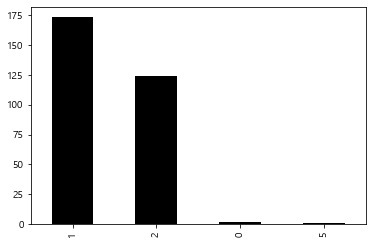

In [114]:
# gender 값의 개수만 확인
df['gender'].value_counts(). plot.bar(color = 'k')

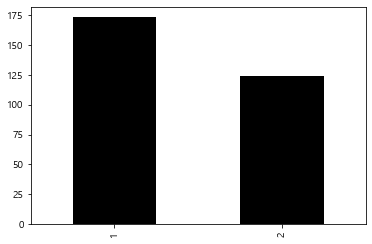

In [115]:
# 이상한 데이터 확인 - 0, 5
# 명목척도는 척도 이외의 값이 있으면 제거
df = df[(df['gender'] == 1) | (df['gender'] == 2)]
df['gender'].value_counts().plot.bar(color = 'k')

## 3.서열 척도
#### : 구분뿐 아니라 순위를 표현하는 숫자로 만든 데이터
> 범주형
- 학력 수준이나 학교 성적 등수 같은 데이터
- 명목 척도처럼 기술 통계는 별 의미가 없고 비율만 확인하는 것이 일반적
- 순서는 명확하지만 순서마다 차이는 일정하지 않고 알기가 어려움

## 4. 등간 척도
#### : 범주형으로 구분, 순위, 값의 간격이 일정한 데이터
- 학교 성적이나 설문조사의 만족도
- 이 경우부터 기술 통계량이 의미있음

## 5. 비율 척도
#### : 연속형 데이터로 만들어진 데이터
- 기술통계값이 의미 있음
- 빈도분석 시 주의
- 사용자의 입력으로 생성됨
> 빈도 분석 시 너무 많은 항목이 생성될 수 있음
> binning(구간 분할) 하여 빈도분석 하는 것이 일반적

***
# **표본 추출
### - 전수조사와 표본조사
- 전수조사는 모집단 내의 모든 대상을 상대로 조사하는 것
> 모집단의 특성을 정확하게 반영
>
> 비용과 기간이 많이 소모
- 표본조사는 모집단에서 일정한 대상을 샘플링해서 조사하는 것
> 전수조사의 단점을 보완할 수 있지만 잘못된 샘플링을 하게 되면 모집단의 특성을 정확하게 반영할 수 없음
- 모수는 모집단의 특성을 나타내는 수치를 의미하며 통계량이라 칭할 땐 표본의 특성을 나타내는 것임
- sample(표본)
> : 큰 데이터 집합의 부분집합
- population(모집단)
> : 데이터 전체 대상
- N(n)
> : 모집단 개수
    
- 랜덤 표본 추출
> : 무작위 표본
> : 조금 더 큰 개념이며 충화 표본 추출과 단순 랜덤 추출을 포함하는 의미

- 충화 표본 추출
> : 모집단을 층으로 나눈 뒤 각 층에서 무작위로 표본을 추출하는 것
- 단순 랜덤 추출
> : 충화없이 표본을 추출하는 것

- 복원 추출
> : 이전에 추출된 데이터를 다시 모집단에 넣고 추출
> 주사위
- 비복원 추출
> : 이전에 추출된 데이터를 모집단에서 제거하고 추출
> 로또

- 표본 편향
> : 잘못된 표본

- 추정
> - 점추정 : 하나의 값과 일치하는지 추정
> - 구간 추정 : 범위를 가지고 추정
> - 신뢰수준 : 계산된 구간이 모수를 포함할 확률을 의미하며 보통 90%, 95%, 99%를 사용
> - 유의수준 : 계산된 구간이 우연히 모수의 특성을 포함할 확률 0.1 0.05 0.01을 사용 (p-value)
> > 특정 유의 수준을 설정하고 그 유의 수준보다 낮게 나오면 기각한다던가 채택을 함
> - 신뢰구간 : 모수를 포함할 상한값과 하한값
> - 표본오차(잔차) : 모집단에서 추출한 표본이 모집단의 특성과 정확히 일치하지 않아서 발생하는 확률의 차이
> - 대통령 후보의 지지율 여론조사에서 후보의 지지율이 95% 신뢰수준에서 표본오차 +-3% 범위 내에서 32.4%로 조사되었다는 의미는 지지율이 29.4 - 35.4%가 나올 확률이 95%라는 의미
> > 5%는 틀릴 수도 있다.

## 1. 단순 임의 추출
### 1) 파이썬에서의 random 모듈이 제공
> random.random() 을 이용하여 복원 추출
>
> random.sample() 을 이용하면 비복원 추출
>
> random.shuffle(시퀀스 자료형) 을 이용하면 시퀀스 자료형을 랜덤하게 섞음
>
> random() 함수는 0과 1 사이의 실수를 리턴
>
> randrange(시작숫자, 종료숫자)를 이용하여 범위를 변경
>
> randint(시작숫자, 종료숫자)

In [120]:
import random
li = list(range(1, 49, 1))
random.shuffle(li)
print(li)

[38, 12, 29, 40, 6, 48, 36, 14, 21, 7, 10, 32, 11, 8, 37, 9, 16, 28, 15, 30, 43, 24, 23, 4, 46, 47, 18, 42, 5, 45, 27, 26, 34, 35, 25, 13, 31, 17, 41, 20, 44, 33, 2, 19, 1, 39, 22, 3]


In [121]:
# 실행할 때마다 출력 값이 달라짐
import random
li = list(range(1, 49, 1))
random.shuffle(li)
print(li)

[13, 38, 20, 44, 15, 24, 40, 41, 6, 33, 29, 48, 2, 46, 4, 30, 22, 42, 45, 19, 21, 25, 47, 23, 34, 9, 12, 7, 31, 3, 8, 14, 5, 37, 18, 17, 1, 11, 39, 26, 28, 35, 36, 16, 27, 10, 32, 43]


In [123]:
# 비복원 추출
print(random.sample(li, k = 4))

[46, 11, 32, 37]


## 2. 가중치를 설정한 추출
- numpy의 choice 메소드를 이용하면 가중치를 설정하여 추출 가능
- choice(배열, size = 추출할 개수, replace = 복원추출여부, p = [확률])
> 0 - 10
>
> 1 - 90
- 데이터 비율이 동일하지 않을 때는 확률을 설정해서 추출해야 함
> 0 - 50
>
> 1 - 30
>
> 2 - 20

In [130]:
li = ['라투', '오미크론', '다크스펙터', '나이즈']
print(np.random.choice(li, 4)) # 동일한 비율로 추출
print(np.random.choice(li, 4, p = [0.05, 0.3, 0.15, 0.5])) # 나이즈가 걸릴 확률이 높아짐

['라투' '오미크론' '라투' '오미크론']
['나이즈' '오미크론' '나이즈' '나이즈']


## 3. pandas의 랜덤한 행 추출
- Series나 DataFrame 의 sample 메소드
> n : 추출할 데이터 개수
>
> frac : 전체 개수에서 추출할 비율(fraction)
> > n과 frac은 같이 설정 불가
> replace : 복원추출 여부로 기본값은 False
>
> weights : 가중치
>
> *random_state* : 시드 번호 (*암기*)
> > 머신러닝 시 이 옵션의 값을 변경하면서 수행해보기
> axis : 추출할 방향으로 기본은 행 단위로 추출

## 4. scikit-learn 라이브러리의 model_selection 클래스의 train_test_split() 이용
- 샘플링할 때 가장 많이 사용하는 함수
- 무작위 샘플링을 할 때는 shuffle
- 충화 추출할 때는 stratify 설정
- test_size 옵션을 이용해서 비율을 설정

In [132]:
# 행렬을 생성
# 독립변수(설명변수)는 X로 표현 종종
X = np.arange(20).reshape(10, 2)
print(X) ; print()

# 종속변수는 y로 표현을 많이 함
# 독립변수에 의해 값이 결정되는 것이 종속변수임
# 분류할 때 분류될 클래스가 종속변수

y = np.arange(10)
print(y)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]

[0 1 2 3 4 5 6 7 8 9]


In [135]:
# 성별(sex), 나이(age)를 가지고 생존여부(survived)를 예측
# sex와 age를 묶어서 X로 생성 survived가 y

# X와 y에서 훈련 데이터와 시험 데이터를 분할
# 훈련 데이터는 예측할 모델을 만들기 위한 데이터
# 시험 데이터는 만들어진 모델을 검증하기 위한 데이터
# 7:3이나 8:2를 주로 이용

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = 0.3
                                                    , shuffle = False
                                                    , random_state = 1004)
print(X_train) ; print()
print(y_train)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]

[0 1 2 3 4 5 6]


***
### 참고
***
## overfit(과적합)
- 훈련데이터에는 잘 맞으나 시험 데이터에 잘 안 맞는 경우
- 훈련데이터가 너무 많거나 변수가 너무 많을 때
> 차원 축소 필요

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = 0.3
                                                    , shuffle = True
                                                    , random_state = 596)
print(X_train) ; print()
print(y_train)
# random_state 숫자 바뀌면 값도 바뀌어 나타남

[[ 4  5]
 [18 19]
 [ 0  1]
 [ 2  3]
 [10 11]
 [ 8  9]
 [ 6  7]]

[2 9 0 1 5 4 3]


In [162]:
# 충화 무작위 추출
# 각 계층의 일정한 비율로
# 계층의 비율을 적용해서 데이터를 샘플링

z = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , test_size = 0.3
                                                    , random_state = 1004
                                                    , stratify = z)
print(X_train) ; print()
print(y_train)

[[ 2  3]
 [ 6  7]
 [18 19]
 [10 11]
 [14 15]
 [ 0  1]
 [ 8  9]]

[1 3 9 5 7 0 4]
